<a href="https://colab.research.google.com/github/aslikorkmaz48/NLP_14_Gunluk_Kamp/blob/main/G%C3%BCn%2004_Coklu_Siniflandirma_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Önce Zeyrek'i kuruyoruz
!pip install zeyrek

# 2. Sonra kütüphaneleri içeri aktarıyoruz
import pandas as pd
import nltk
from zeyrek import MorphAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# NLTK paketlerini indirelim (Eksik çıkmasın)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

print("Kütüphaneler ve Zeyrek hazır! ✅")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.0/931.0 kB 25.6 MB/s eta 0:00:00
Kütüphaneler ve Zeyrek hazır! ✅


In [4]:
# 3. Eğitim ve Test Ayrımı
X_train, X_test, y_train, y_test = train_test_split(df['temiz_mesaj'], df['kategori'], test_size=0.2)

# 4. Vektörleştirme
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. Model: SVC
model = SVC(kernel='linear')
model.fit(X_train_vec, y_train)

# 6. Sonuçları Görselleştir
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Departman Yönlendirme Başarı Matrisi')
plt.show()

# 7. CANLI TEST
def departman_tahmin(yorum):
    t = temizle(yorum)
    v = vectorizer.transform([t])
    tahmin = model.predict(v)[0]
    print(f"Müşteri Mesajı: {yorum} \n👉 Yönlendirilen Departman: {tahmin}\n")

departman_tahmin("Ürünün dikişleri sökülmüş, iade istiyorum")
departman_tahmin("Kargo takip numaram çalışmıyor")
departman_tahmin("Kartımdan fazla para çekilmiş")
departman_tahmin("Kurye kabaydı")

NameError: name 'df' is not defined

Türkçe metinler Zeyrek ile analiz ediliyor... (Bu işlem biraz sürebilir)


Görüntülenen çıkış son 5000 satıra kısaltıldı.



✅ Model Başarı Skoru: %100.00


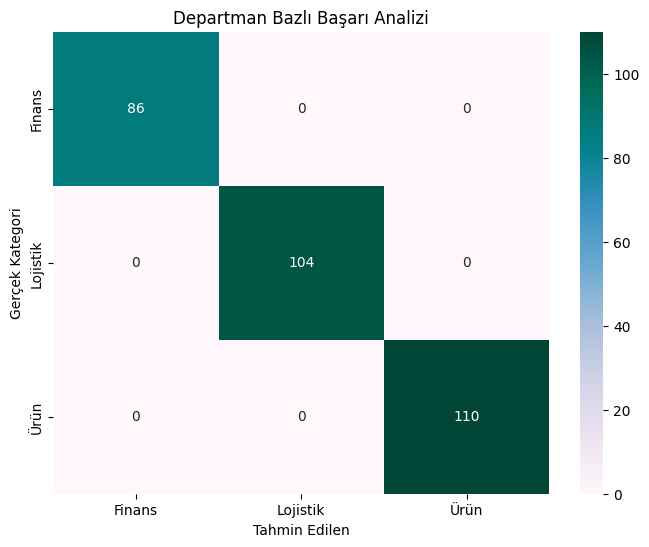


--- Akıllı Yönlendirme Testi ---
Soru: Kurye paketi kapıya bırakıp gitmiş, bulamıyorum 
---> Yönlendirilen Departman: Lojistik

Soru: Hesabımda bekleyen iade tutarı hala görünmüyor 
---> Yönlendirilen Departman: Ürün

Soru: Ürünün ekranı çatlak geldi 
---> Yönlendirilen Departman: Ürün



In [6]:
# ==========================================================
# 4. GÜN: ÇOKLU SINIFLANDIRMA (MULTI-CLASS CLASSIFICATION)
# PROJE: Akıllı Destek Bileti (Ticket) Yönlendirici
# ==========================================================

# 1. ADIM: Kütüphane Kurulumu ve Yükleme
!pip install zeyrek --quiet

import pandas as pd
import nltk
from zeyrek import MorphAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# NLTK Dil Paketleri
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
stop_words = nltk.corpus.stopwords.words('turkish')

# 2. ADIM: Veri Seti Oluşturma
# Gerçek dünyadaki müşteri taleplerini simüle ediyoruz
kargo = ["kargom nerede kaldı", "teslimat çok yavaştı", "paketim ezilmiş", "kurye adresi bulamadı", "takip numaram hatalı"]
finans = ["fiyatlar çok yüksek", "iadem yatmadı", "kartımdan fazla para çekildi", "indirim kodu çalışmıyor", "ödeme hatası alıyorum"]
urun = ["ürün bozuk çıktı", "parçaları eksik", "kalitesi beklediğimden düşük", "bedeni uymadı iade", "ürün rengi farklı geldi"]

data = {
    'mesaj': kargo * 100 + finans * 100 + urun * 100,
    'kategori': ['Lojistik'] * 500 + ['Finans'] * 500 + ['Ürün'] * 500
}
df = pd.DataFrame(data)

# 3. ADIM: Türkçe Ön İşleme (Preprocessing)
analyzer = MorphAnalyzer()

def temizle(metin):
    # Zeyrek ile kök bulma ve küçük harfe çevirme
    analiz = analyzer.lemmatize(metin.lower())
    # Sadece anlamlı kökleri al ve stopwords'leri (ve, ama, ki...) temizle
    kokler = [item[1][0] for item in analiz if item[1][0] not in stop_words and len(item[1][0]) > 2]
    return " ".join(kokler)

print("Türkçe metinler Zeyrek ile analiz ediliyor... (Bu işlem biraz sürebilir)")
df['temiz_mesaj'] = df['mesaj'].apply(temizle)

# 4. ADIM: Vektörleştirme ve Model Eğitimi (SVM)
X_train, X_test, y_train, y_test = train_test_split(df['temiz_mesaj'], df['kategori'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Support Vector Machine (Destek Vektör Makineleri) - Metin sınıflandırmada en güçlülerden biridir.
model = SVC(kernel='linear', C=1.0)
model.fit(X_train_vec, y_train)

# 5. ADIM: Görselleştirme ve Raporlama
y_pred = model.predict(X_test_vec)

print(f"\n✅ Model Başarı Skoru: %{accuracy_score(y_test, y_pred)*100:.2f}")

# Karmaşıklık Matrisi Grafiği
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Departman Bazlı Başarı Analizi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Kategori')
plt.show()

# 6. ADIM: CANLI TEST SİSTEMİ
def destek_botu(mesaj):
    t_mesaj = temizle(mesaj)
    vec = vectorizer.transform([t_mesaj])
    tahmin = model.predict(vec)[0]
    print(f"Soru: {mesaj} \n---> Yönlendirilen Departman: {tahmin}\n")

print("\n--- Akıllı Yönlendirme Testi ---")
destek_botu("Kurye paketi kapıya bırakıp gitmiş, bulamıyorum")
destek_botu("Hesabımda bekleyen iade tutarı hala görünmüyor")
destek_botu("Ürünün ekranı çatlak geldi")